In [1]:
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

We will start comparing species of both universes in this notebook.

In [2]:
# Read in the characters from Star Trek

sts = pd.read_parquet('../WPscraped/StarTrek_Species.parquet')

# Read in the characters from Star Wars

sws = pd.read_parquet('../WPscraped/StarWars_Species.parquet')

In [3]:
# View sts

sts.head()

,name,homeworld,warpCapableSpecies,humanoidSpecies,spaceborneSpecies
0,892-IV native,"{'name': '892-IV', 'uid': 'ASMA0000015188'}",False,True,False
1,Aaamazzarite,None,False,True,False
2,Aamaarazan,None,False,True,False
3,Abaddon's species,None,False,True,False
4,Abdon's species,None,False,True,False


In [4]:
# View sts info
sts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                759 non-null    object
 1   homeworld           286 non-null    object
 2   warpCapableSpecies  759 non-null    bool  
 3   humanoidSpecies     759 non-null    bool  
 4   spaceborneSpecies   759 non-null    bool  
dtypes: bool(3), object(2)
memory usage: 14.2+ KB


In [5]:
# View sws

sws.head()

,name,designation,classification,height,skin_color,hair_color,distinctions,homeworld,language
0,Abednedo,Sentient,None,None,"['Brown', 'Cream', 'Gray', 'Orange', 'Pink', '...","['Blond', 'Brown', 'Gray', 'White']",Dangling mouth tendrils,Abednedo,Abednedish
1,Abersyn symbiote,Sentien,"['Parasite', 'Symbiote']",None,"['Brown', 'Cream', 'Gray', 'Orange', 'Pink', '...","['Blond', 'Brown', 'Gray', 'White']",Dangling mouth tendrils,None,None
2,Abyssin,Sentient,None,None,"['Blue', 'Green']",Green and white,"['Cycloptic', 'regenerative abilities']",Byss,None
3,Accipiptero,None,Reptavian,None,Brown,None,None,Dagobah,None
4,Acklay,Non-sentient,Amphibious crustacean,None,Green,None,"['Grappling hands', 'Stretchy stomachs', 'Razo...",Vendaxa,None


In [6]:
# View sws info

sws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            1051 non-null   object
 1   designation     1051 non-null   object
 2   classification  1051 non-null   object
 3   height          1051 non-null   object
 4   skin_color      1051 non-null   object
 5   hair_color      1051 non-null   object
 6   distinctions    1051 non-null   object
 7   homeworld       1051 non-null   object
 8   language        1051 non-null   object
dtypes: object(9)
memory usage: 74.0+ KB


The first thing to notice is there is more information available on Wookieepedia than STAPI.  We will clean up the species dataframes for both to be: Name and homeworld.  We will also try to determine sentient species in both.

In [7]:
# Create consolidated Star Trek species dataframe

sws_updated = sws[['name', 'homeworld', 'designation']]

# Test sts_updated
sws_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1051 non-null   object
 1   homeworld    1051 non-null   object
 2   designation  1051 non-null   object
dtypes: object(3)
memory usage: 24.8+ KB


We will start determining how many sentient species make up each dataset.

In [8]:
# Start by grouping Star Wars designations to find out how many there are

sws_des = sws_updated['designation']

# Clean up dataset and make the same text and remove extra characters
sws_des = sws_des.str.lower().str.strip()

# Combine "sentient" and "sentien" together, and "non-sentient" and "non-sentien"
sws_des = sws_des.replace(['sentien', 'non-sentien', 'human'], ['sentient', 'non-sentient', 'sentient'])

# Create a count and group to see errors

sws_des2 = sws_des.value_counts()

# View list and count
print(sws_des2)

sentient                              422
none                                  318
non-sentient                          279
semi-sentient                          16
bird                                    2
crustacean                              1
amphibian                               1
fly                                     1
fish                                    1
mammal                                  1
at least semi-sentient                  1
primate                                 1
cyborg jellyfish                        1
zombie                                  1
possibly semi-sentient or sentient      1
insect                                  1
coral                                   1
reptilian                               1
spider                                  1
Name: designation, dtype: int64


In [9]:
# Create a variable for use in charts

sw_sentient = sws_des2['sentient'].sum()
sw_sentient

422

In [10]:
# Star Trek does not have a "sentience" designation, so we will look into the count of humanoid, spaceborne, and warpcapable booleans

# Create a count for humanoid
sts_humanoid = sts.value_counts('humanoidSpecies')

# Print humanoid count
print(sts_humanoid)

# Create a count for spaceborne
sts_space = sts.value_counts('spaceborneSpecies')

# Print spaceborne count
print(sts_space)

# Create a count for warp capable
sts_warp = sts.value_counts('warpCapableSpecies')

# Print warp capable count
print(sts_warp)

humanoidSpecies
True     490
False    269
dtype: int64
spaceborneSpecies
False    744
True      15
dtype: int64
warpCapableSpecies
False    659
True     100
dtype: int64


In [11]:
# Check to see if humanoid and spaceborne overlap

sts['overlap'] = sts['humanoidSpecies'] & sts['spaceborneSpecies']

# Count of overlap
overlap_count = sts['overlap'].sum()

# Check to see if humanoid and warp capable overlap
sts['warp_overlap'] = sts['humanoidSpecies'] & sts['warpCapableSpecies']

# Count of warp overlap
warp_overlap = sts['warp_overlap'].sum()

# Print counts
print(overlap_count)
print(warp_overlap)

4
89


There are 490 humanoid species, 100 warp capable species, and 15 spaceborne.  89 of the Warp Capable are humanoid, leaving 11 non-humanoid warp capable species. There are 15 spaceborne species, and 4 of those are humanoid.  We could combine those.  We will create a variable to add those together.

In [12]:
# Create a variable to show the count of humanoid and warpcapable without the overlap

warp_count = len(sts[sts['humanoidSpecies'] | sts['warpCapableSpecies']])

# Print the warp_count
print(warp_count)

501


Now we have what we can determine to be the sentient species of both universes.  Star Wars has 422 of its 1051 species designated as sentient. Star Trek has 501 of its 759 species where we can determine they are sentient. We will create graphs to show this.

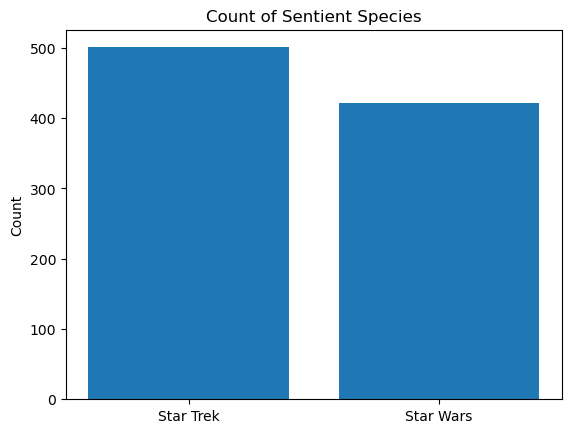

In [13]:
# Start creating variable for sentience
sentience = [warp_count, sw_sentient]

# Create bar chart
plt.bar(['Star Trek', 'Star Wars'], sentience)

# Add labels and title
plt.ylabel('Count')
plt.title('Count of Sentient Species')

# Show Plot
plt.show()


In [28]:
# We will create a pie graph for each to show percentages of sentient species compared to total species.

# Start with Star Trek

st_percent = warp_count / len(sts) * 100

print(st_percent)

66.00790513833992


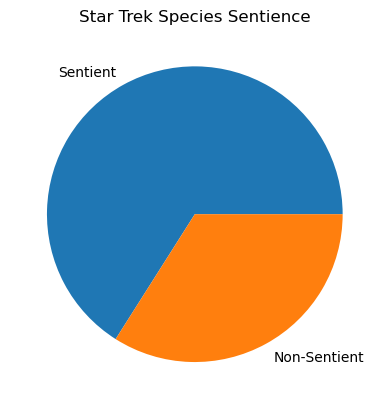

In [38]:
# Create the pie chart
stlabels = ['Sentient', 'Non-Sentient']
stsizes = [st_percent, (100-st_percent)]

# Plot pie chart 
plt.pie(stsizes, labels=stlabels)
plt.title('Star Trek Species Sentience')
plt.show()

In [36]:
# We will find the percentage of sentient species in Star Wars

sw_percent = sw_sentient / len(sws_updated) * 100
print(sw_percent)

40.15223596574691


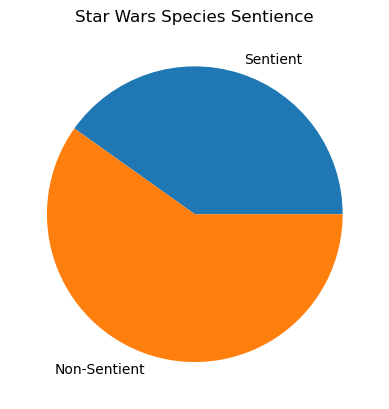

In [39]:
# Create the pie chart
swlabels = ['Sentient', 'Non-Sentient']
swsizes = [sw_percent, (100-sw_percent)]

# Plot pie chart
plt.pie(swsizes, labels=swlabels)
plt.title('Star Wars Species Sentience')
plt.show()

We have completed some species comparisons between the two universes. 

Both universes have diverse species ranging from humanoid to various creatures.  In looking into the number of sentient species in both universes, Star Trek has more sentient species (501) and a higher percentage of sentient to total (66%).  

Meanwhile, Star Wars has 422 sentient species, or 40% of its identified species. While there are less sentient species, it shows more interaction and observation of non-sentient creatures.  Likewise, it could be argued that the Star Trek universe has more evolved species that have become sentient.  

